In [99]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.optimize as op

In [100]:
ex2data1 = np.loadtxt("../../models/ex2data1.txt",
delimiter=',')

In [101]:
def plot_data(x, y, title='Scatter plot of the training sample'):
    fig, ax = plt.subplots(figsize=(9, 7))
    data = np.hstack((x, y.reshape((len(y), 1))))
    false_data = data[np.in1d(data[:, 2], [0])]
    true_data = data[np.in1d(data[:, 2], [1])]
    ax.plot(false_data[:, 0], false_data[:, 1], 'o', color='red', label='Not admitted')
    ax.plot(true_data[:, 0], true_data[:, 1], '+', color='green', label='Admitted')
    ax.set(xlabel='Exam 1 score', ylabel='Exam 1 score',
           title=title)
    ax.grid()
    ax.legend()


def plot_data_with_decision(x, y, theta, title='Scatter plot of the training sample'):
    fig, ax = plt.subplots(figsize=(9, 7))
    data = np.hstack((x, y.reshape((len(y), 1))))
    false_data = data[np.in1d(data[:, 2], [0])]
    true_data = data[np.in1d(data[:, 2], [1])]
    ax.plot(false_data[:, 0], false_data[:, 1], 'o', color='red', label='Not admitted')
    ax.plot(true_data[:, 0], true_data[:, 1], '+', color='green', label='Admitted')
    ax.set(xlabel='Exam 1 score', ylabel='Exam 1 score',
           title=title)

    plot_x = np.array([np.min(x[:, 1]), np.max(x[:, 1])])
    plot_y = (-1 / theta[2]) * (theta[1] * plot_x + theta[0])
    ax.plot(plot_x, plot_y, label='decision')

    ax.grid()
    ax.legend()

In [102]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def vector_to_column(x):
    return x.reshape((x.shape[0], 1))


def vector_to_row(x):
    return x.reshape((1, x.shape[0]))

In [103]:
def h_func(theta, x):
    return sigmoid(theta.T @ x.T)

In [104]:
def cost_function(theta, x, y):
    theta = theta.reshape((len(theta), 1))
    cost = np.sum(-y * np.log(h_func(theta, x)) - (1 - y) * np.log(1 - h_func(theta, x))) / m
    return cost


def cost_function_grad(theta, x, y):
    theta = np.array(theta).reshape((len(theta), 1))
    axis_m = np.sum((h_func(theta, x) - y) @ x, axis=0) / m
    return axis_m

100 2


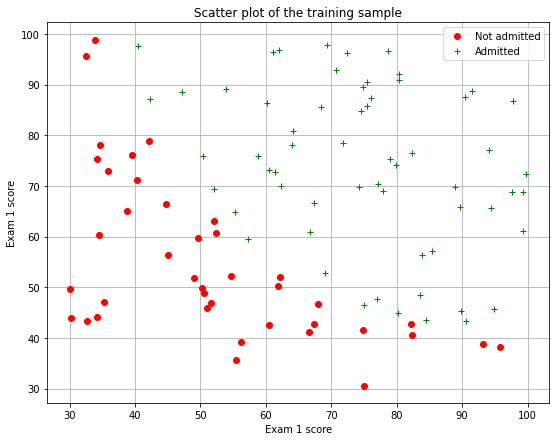

In [105]:
x, y = ex2data1[:, 0:2], ex2data1[:, 2]
m, n = x.shape
print(m, n)
plot_data(x, y)

In [106]:
def intercept(t):
    return np.hstack((np.ones((m, 1)), t))

In [107]:
x_before = x
x = intercept(x)
initial_theta = np.zeros((n + 1, 1))
cost = cost_function(initial_theta, x, y)
grad = cost_function_grad(initial_theta, x, y)
print(f'Стоимость для начального значения theta (нулевого): {cost}')
print('Ожидаемая стоимость (примерно): 0.693')
print(f'Градиент для начального значения theta (нулевого): {grad}')
print('Ожидаемые значения градиента (примерно): -0.1000 -12.0092 -11.2628')

Стоимость для начального значения theta (нулевого): 0.6931471805599453
Ожидаемая стоимость (примерно): 0.693
Градиент для начального значения theta (нулевого): [ -0.1        -12.00921659 -11.26284221]
Ожидаемые значения градиента (примерно): -0.1000 -12.0092 -11.2628


Стоимость для theta, найденная minimize: 0.2034977015894438
Ожидаемая стоимость (примерно): 0.203
theta: [-25.16133284   0.2062317    0.2014716 ]
Ожидаемое значение theta (примерно): -25.161 0.206 0.201


/var/folders/kn/88sbr04d6hn6srx441z7l1zh0000gn/T/ipykernel_10666/731153179.py:3: RuntimeWarning: divide by zero encountered in log
  cost = np.sum(-y * np.log(h_func(theta, x)) - (1 - y) * np.log(1 - h_func(theta, x))) / m
/var/folders/kn/88sbr04d6hn6srx441z7l1zh0000gn/T/ipykernel_10666/731153179.py:3: RuntimeWarning: invalid value encountered in multiply
  cost = np.sum(-y * np.log(h_func(theta, x)) - (1 - y) * np.log(1 - h_func(theta, x))) / m


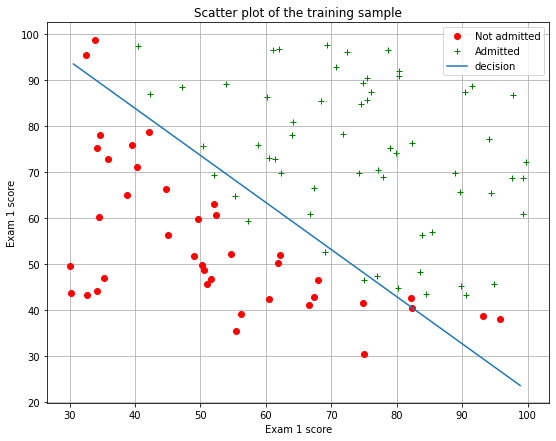

In [108]:
theta = op.minimize(fun=cost_function,
                    x0=initial_theta.T,
                    args=(x, y),
                    options={'maxiter': 400},
                    jac=cost_function_grad).x
cost = cost_function(theta.reshape((len(theta), 1)), x, y)
print(f'Стоимость для theta, найденная minimize: {cost}')
print('Ожидаемая стоимость (примерно): 0.203')
print(f'theta: {theta}')
print(f'Ожидаемое значение theta (примерно): -25.161 0.206 0.201')
plot_data_with_decision(x_before, y, theta)

In [109]:
def predict(theta, x):
    intercepted = intercept(x.atleast_2d())
    return 1 if h_func(theta, intercepted) >= 0.5 else 0

In [110]:
prob = sigmoid(np.array([1, 45, 85]).reshape((1, 3)) @ theta.reshape((3, 1))).item()
print(f'Для студента с баллами 45 и 85 мы прогнозируем вероятность поступления {prob}')
print('Ожидаемое значение: 0.775 +/- 0.002')

Для студента с баллами 45 и 85 мы прогнозируем вероятность поступления 0.7762907240588942
Ожидаемое значение: 0.775 +/- 0.002


In [ ]:
p = predict()